<!-- Implement the Continuous Bag of Words (CBOW) Model. Stages can be: -->

In [24]:
#Import Libraries
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
data = "Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation   learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."
data



'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation   learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.'

In [26]:
#Split into sentences
sentences = data.split('.')
sentences = [sentence for sentence in sentences if sentence.strip()]

In [27]:
#Clean Data of Special Characters
clean_sent = []
for sentence in sentences:
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence = re.sub(r'(?:^| )\\w (?:$| )', ' ', sentence).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)

In [29]:
#Create dictionaries for word lookup
index_to_word = {}
word_to_index = {}

In [30]:
for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

In [31]:
# Create dictionaries to map between word and integer IDs
vocab_size = len(tokenizer.word_index) + 1
emb_size = 100 
context_size = 2

In [32]:
#Create contexts and targets for CBOW model
contexts = []
targets = []

for sequence in sequences:
    for i in range(1, len(sequence) - 1):
        if i - context_size >= 0 and i + context_size < len(sequence):
            target = sequence[i]
            context = [sequence[i - context_size], sequence[i + context_size]]
            contexts.append(context)
            targets.append(target)

In [33]:
#Convert contexts and targets to NumPy arrays
X = np.array(contexts)
Y = np.array(targets)

In [34]:
#Define the CBOW model architecture
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),  # Removed input_length
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [35]:
#Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
#Train the model
history = model.fit(X, Y, epochs=100, batch_size=32)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0096 - loss: 4.3176 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1516 - loss: 4.2992
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3516 - loss: 4.2826
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4634 - loss: 4.2647
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5153 - loss: 4.2449
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5483 - loss: 4.2215
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5366 - loss: 4.2000
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5174 - loss: 4.1735
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4556 - loss: 4.1432
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4925 - loss: 4.1094
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4538 - loss: 4.0698
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4560 - loss: 4

In [37]:
#Visualize training loss
embeddings = model.get_weights()[0]

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

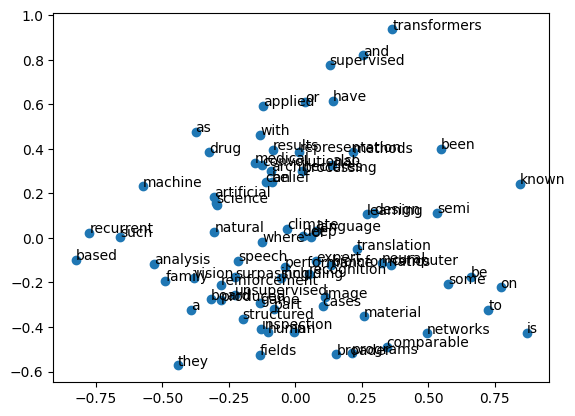

In [39]:
import matplotlib.pyplot as plt
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, word in enumerate(index_to_word.values()):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.show()

In [40]:
test_sentences = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

for sent in test_sentences:
    test_words = sent.split(" ")
    x_test = []
    for i in test_words:
        # Add a default index for unknown words (e.g., 0 for unknown)
        word_index = word_to_index.get(i, 0)
        x_test.append(word_index)
    
    # Convert the list to a NumPy array
    x_test = np.array([x_test])

    # Predict and display the result
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred), "\n\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= neural 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= results 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 


